<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/AIFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img , img_to_array 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
from keras.models import load_model
import os
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/HinhAI/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('bs'):#Bus-khach
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('s'):#Sedan
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sv'):#SUV
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('t'):#Tau Hoa
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('xm'):#xemay
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('xt'):#Xetai
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
 if file.startswith('a'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('b'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('bt'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
classes = ["Bus-Khach","Sedan","SUV","Tau Hoa","Xe May","Xe Tai","May Bay","Tau-Thuyen","Ban Tai"]
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

# Normalize the images
photos = photos.astype('float32') / 255.0
# Split the data into training and testing sets
train_photos, test_photos, train_labels, test_labels = train_test_split(photos, labels, test_size=0.1, random_state=42)

save('AI.npy', photos)
save('AI_label.npy', labels)


(349, 200, 200, 3) (349,)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(photos, labels, epochs=70, batch_size=512, verbose=1)

Epoch 1/70
1/1 [==============================] - 10s 10s/step - loss: 2.5930 - accuracy: 0.0860
Epoch 2/70
1/1 [==============================] - 0s 387ms/step - loss: 29.9627 - accuracy: 0.0888
Epoch 3/70
1/1 [==============================] - 0s 389ms/step - loss: 12.5806 - accuracy: 0.1777
Epoch 4/70
1/1 [==============================] - 0s 386ms/step - loss: 5.7824 - accuracy: 0.1891
Epoch 5/70
1/1 [==============================] - 0s 388ms/step - loss: 4.8757 - accuracy: 0.0888
Epoch 6/70
1/1 [==============================] - 0s 480ms/step - loss: 2.7178 - accuracy: 0.2120
Epoch 7/70
1/1 [==============================] - 0s 469ms/step - loss: 2.6399 - accuracy: 0.2120
Epoch 8/70
1/1 [==============================] - 1s 538ms/step - loss: 2.3637 - accuracy: 0.2206
Epoch 9/70
1/1 [==============================] - 0s 468ms/step - loss: 2.2554 - accuracy: 0.1032
Epoch 10/70
1/1 [==============================] - 0s 484ms/step - loss: 2.2025 - accuracy: 0.1060
Epoch 11/70
1/1 [=

In [ ]:
model.evaluate(photos,labels)

11/11 [==============================] - 1s 52ms/step - loss: 0.3796 - accuracy: 0.7307


[0.3796200156211853, 0.730659008026123]

In [ ]:
model.save('AIFinal.h5')

1/1 [==============================] - 0s 79ms/step


'May Bay'

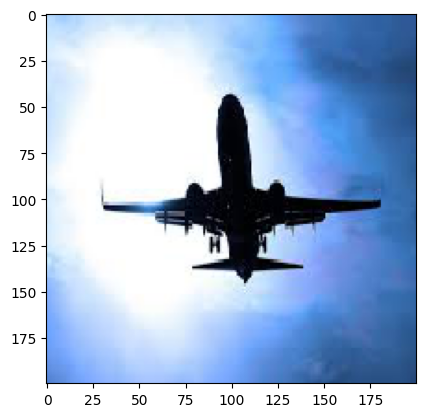

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/a52.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 47ms/step


'Tau-Thuyen'

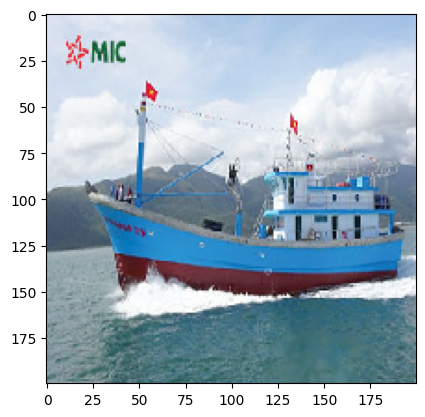

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/b8.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 28ms/step


'Bus-Khach'

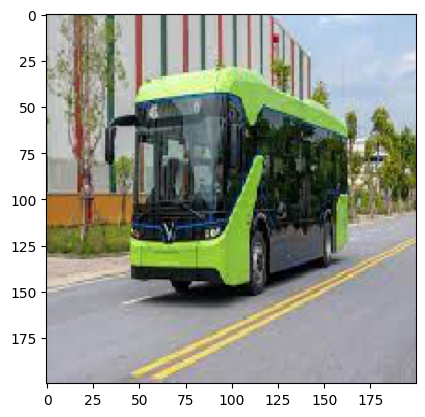

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/bs1.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 35ms/step


'Sedan'

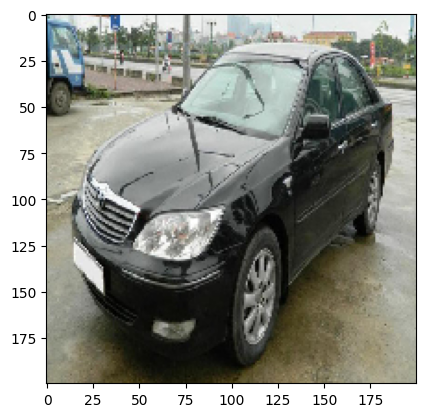

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/s2.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step


'SUV'

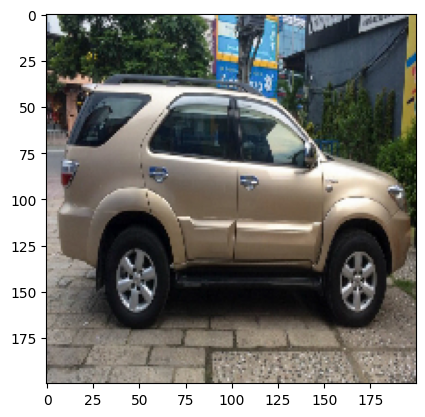

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/sv20.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 19ms/step


'Tau Hoa'

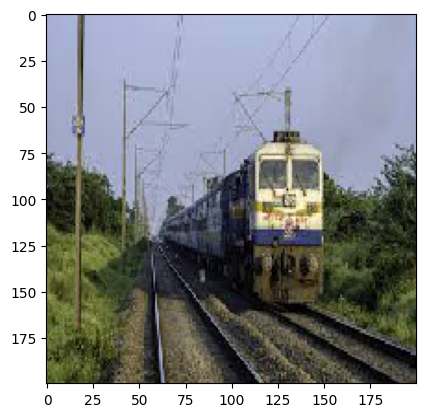

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/t100.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step


'Xe May'

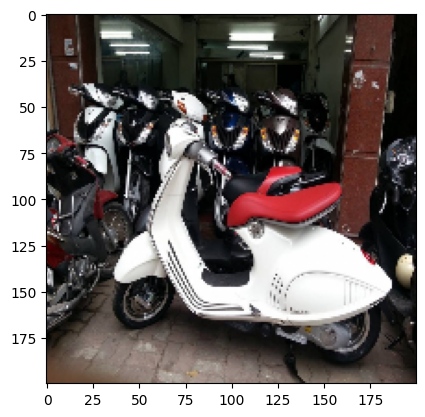

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/xm50.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 20ms/step


'Xe May'

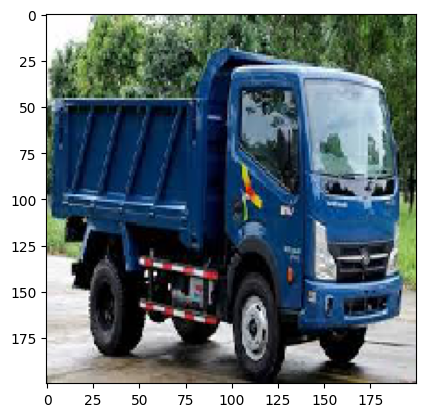

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/xt79.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 84ms/step


'Ban Tai'

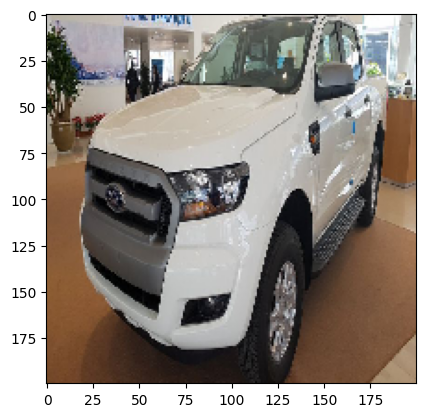

In [ ]:
img = load_img('/content/drive/MyDrive/HinhAI/TEST/bt4.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]